In [1]:
import os
import sqlite3

import matplotlib.pyplot as plt
import numpy as np
import nfts.dataset

### Dataset Opening

In [3]:
dirname = os.path.dirname(os.path.abspath("__file__"))
DATASET_PATH = os.path.join(dirname, 'nfts.sqlite')
ds = nfts.dataset.FromSQLite(DATASET_PATH)

mints_df = ds.load_dataframe("mints")
mints_df.head()

,event_id,transaction_hash,block_number,nft_address,token_id,from_address,to_address,transaction_value,timestamp
0,6c6d226e-2096-4b50-ac3f-f7078ca3a0c2,0xe47ac62111db3a6de2957394944501feb7d55cbef00a...,12936415,0x02AA731631c6D7F8241d74F906f5b51724Ab98F8,3223,0x0000000000000000000000000000000000000000,0x8D745Fb3311cC86ED52C177dA0d039C1862F3e13,0.000000e+00,1627776933
1,263c923f-4db9-4d81-a547-27e1fe5ec405,0xe47ac62111db3a6de2957394944501feb7d55cbef00a...,12936415,0x02AA731631c6D7F8241d74F906f5b51724Ab98F8,5077,0x0000000000000000000000000000000000000000,0x8D745Fb3311cC86ED52C177dA0d039C1862F3e13,0.000000e+00,1627776933
2,8baa8502-42f9-453e-824a-ad504045c9c5,0xe47ac62111db3a6de2957394944501feb7d55cbef00a...,12936415,0x02AA731631c6D7F8241d74F906f5b51724Ab98F8,5070,0x0000000000000000000000000000000000000000,0x8D745Fb3311cC86ED52C177dA0d039C1862F3e13,0.000000e+00,1627776933
3,364ee658-ff31-4d0a-a7a7-60d3d7822772,0xe47ac62111db3a6de2957394944501feb7d55cbef00a...,12936415,0x02AA731631c6D7F8241d74F906f5b51724Ab98F8,3757,0x0000000000000000000000000000000000000000,0x8D745Fb3311cC86ED52C177dA0d039C1862F3e13,0.000000e+00,1627776933
4,58d3adc3-03d2-4e7b-b02c-47957c1f5752,0xd44be17c0298717ce001843069b0a2ca08b577fa2b33...,12936414,0x57f1887a8BF19b14fC0dF6Fd9B2acc9Af147eA85,3252202771441387673917605047769619801375983664...,0x0000000000000000000000000000000000000000,0x283Af0B28c62C092C9727F1Ee09c02CA627EB7F5,2.251726e+15,1627776925


### Mints per Contract

array([[<AxesSubplot:title={'center':'num_nfts'}>]], dtype=object)

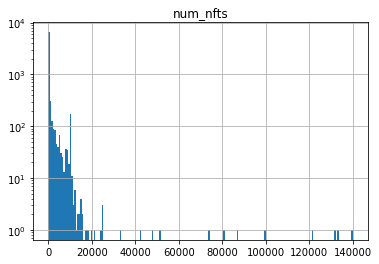

In [5]:
mint_stats_df = mints_df.groupby('nft_address', as_index=False).size().rename(columns={'size':'num_nfts'})
mint_stats_df.hist('num_nfts', bins=200, log=True)

In [6]:
mint_stats_df.quantile(q = np.arange(0.1, 1.1, 0.1))

,num_nfts
0.1,1.0
0.2,2.0
0.3,3.0
0.4,7.0
0.5,15.0
0.6,36.0
0.7,100.0
0.8,315.8
0.9,1718.6
1.0,139894.0


In [9]:
analysis_sample_df = mint_stats_df[mint_stats_df['num_nfts']>=100]
analysis_sample_df.head()

,nft_address,num_nfts
1,0x000000000437b3CCE2530936156388Bff5578FC3,129
6,0x00000633Df1228868270bAdB2B812E12e13fdB91,1088
8,0x000E49C87d2874431567d38FF9548890aB39BAac,6650
9,0x001B4b85192aa034bff1524f181e3a7060e0dC30,112
17,0x004f5683e183908D0f6b688239e3e2D5bbb066CA,10000


In [10]:
analysis_sample_df.count()

nft_address    2357
num_nfts       2357
dtype: int64

### NFTs minted per address

### Minting period

### Do NFTs charge for minting?

### Conclusions